<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula03b_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np

def criaDatasetRegressão(n=20, slop=0.5, intercept=0.2):
    """
    Cria um dataset para regressão com função geradora com
    inclinação e interceptação do eixo vertical parametrizados.
    """
    X = np.random.uniform(size=(n,1))
    AUX = np.random.rand(n,1)-0.5
    y = X*slop+intercept + AUX*0.1
    y = y.flatten()
    return X, y

slop = 0.5
intercept = 0.2
Xtr, ytr = criaDatasetRegressão(n=20, slop=slop, intercept=intercept)
Xtr.T, ytr.T

(array([[0.67146977, 0.84462894, 0.40932779, 0.38648235, 0.20442153,
         0.39895642, 0.80128862, 0.79965444, 0.53003441, 0.65506639,
         0.77143154, 0.84818663, 0.12601899, 0.36213826, 0.7574066 ,
         0.68177541, 0.79520161, 0.81675259, 0.14987478, 0.42558117]]),
 array([0.54894612, 0.63548189, 0.44554945, 0.4431187 , 0.27036905,
        0.41299824, 0.63268926, 0.64196692, 0.48571934, 0.48860482,
        0.62660477, 0.63761162, 0.26774133, 0.41194238, 0.57298926,
        0.50193748, 0.54991544, 0.63080149, 0.27900264, 0.39299785]))

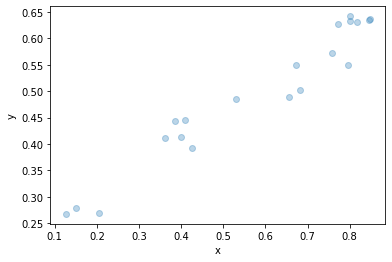

In [24]:
import matplotlib.pyplot as plt

def plotaDatasetRegressão(X, y):
    """
    Plota um dataset de regressão.
    """
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(X[:,0], y, "o", alpha=0.3)

plotaDatasetRegressão(Xtr, ytr)

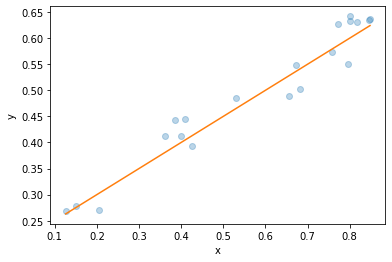

In [25]:
def plotaFunçãoDatasetRegressão(X, y, slop, intercept=0):
    """
    Plota um dataset de regressão com uma função definida por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    xmin = min(X)
    xmax = max(X)
    xs = np.linspace(xmin, xmax, num=2)
    ys = xs * slop+intercept
    plt.plot(xs,ys)

plotaDatasetRegressão(Xtr, ytr)
plotaFunçãoDatasetRegressão(Xtr, ytr, slop, intercept)

In [26]:
def mse(yactual, ypred):
    return sum((yactual - ypred)**2)/len(yactual)

def rmse(yactual, ypred):
    return np.sqrt(mse(yactual, ypred))

In [27]:
def identity(a):
  return a

In [28]:
from abc import ABC, abstractstaticmethod

class Custo(ABC):
  @abstractstaticmethod
  def custo(y, ypred):
    pass
  @abstractstaticmethod
  def gradiente(y, ypred, X):
    pass
  
class WidrowHoff(Custo):
  @staticmethod
  def custo(y, ypred):
    return np.sum((y - ypred)**2)
  @staticmethod
  def gradiente(y, ypred, X):
    return X.T @ (y - ypred)


In [29]:
from abc import ABC, abstractmethod

class TrainingAlgorithm(ABC):
  @abstractmethod
  def getW(self, X, y, activation):
    pass

class PseudoInversa(TrainingAlgorithm):
  def __init__(self, regularization=0):
    self.regularization = regularization
  def getW(self, X, y):
    return np.linalg.inv(X.T @ X + np.eye(X.shape[1])*self.regularization) @ X.T @ y


class DescidaGradiente(TrainingAlgorithm):
  def __init__(self, max_iter=100, learning_rate=0.05, 
               regularization=0, cost=WidrowHoff()):
    self.max_iter = max_iter
    self.learning_rate = learning_rate
    self.regularization = regularization
    self.cost = cost

  def getW(self, X, y):
    w = np.random.uniform(-1, 1, size=X.shape[1])
    for _ in range(self.max_iter):
      ypred = X @ w
      if self.cost.custo(y, ypred) == 0:
        break
      w *= 1 - self.regularization * self.learning_rate
      w += self.cost.gradiente(y, ypred, X) * self.learning_rate
    return w

0.028979294902675812
[0.2100071  0.49676141]


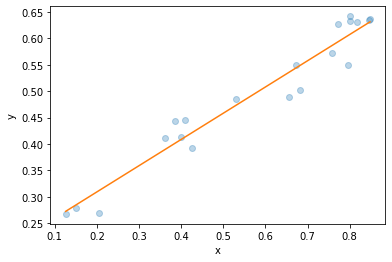

In [30]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, training_algorithm=DescidaGradiente()):
     self.w = None
     self.activation = identity
     self.training_algorithm = training_algorithm

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = self.training_algorithm.getW(Xb, y)

  def __pre_activation(self, X):
    Xb = include_bias(X)
    return Xb @ self.w

  def predict(self, X):
    a = self.__pre_activation(X)
    ypred = self.activation(a)
    return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(rmse(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetRegressão(Xtr, ytr)
plotaFunçãoDatasetRegressão(Xtr, ytr, perceptron.w[1:], perceptron.w[0])

0.03065016884859352


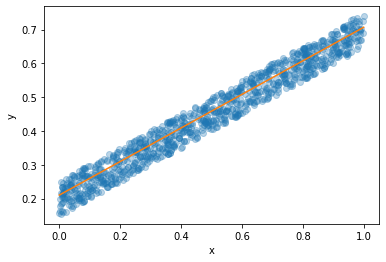

In [31]:
Xte, yte = criaDatasetRegressão(n=1000, slop=slop, intercept=intercept)
print(rmse(yte, perceptron.predict(Xte)))
plotaDatasetRegressão(Xte, yte)
plotaFunçãoDatasetRegressão(Xte, yte, perceptron.w[1:], perceptron.w[0])

1.0
[-1.16149352  5.73615586 -2.07819062]


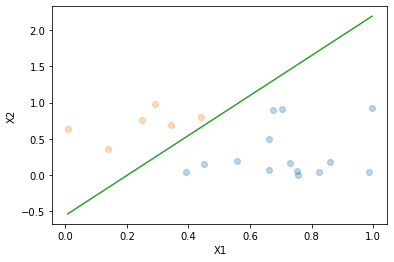

0.927


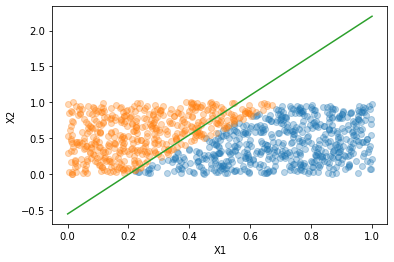

In [21]:
perceptron = Perceptron(training_algorithm=DescidaGradiente(cost=HingeLoss()))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])
plt.show()
print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])

1.0
[-0.48760481  7.09001095 -4.01349142]


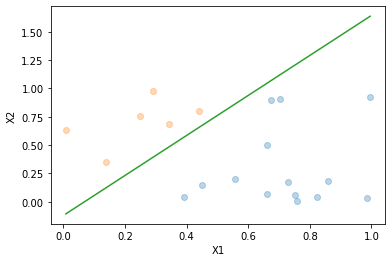

0.887


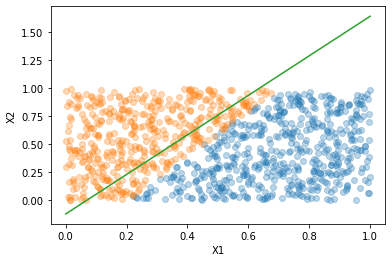

In [22]:
perceptron = Perceptron(training_algorithm=DescidaGradiente(cost=LogLikehood()))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])
plt.show()
print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])